In [44]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
%matplotlib widget

In [45]:
path = 'output'
data_files = sorted(glob.glob(os.path.join(path, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))

In [46]:
data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
data.shape

(190464, 2)

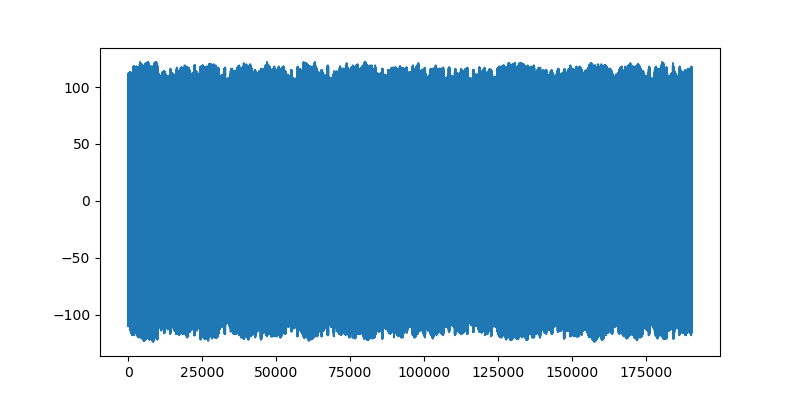

In [47]:
plt.figure(figsize=(8,4))
plt.plot(data[:,0])